In [40]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Importing the Train Dataset

In [75]:


# get the data from txt files to pandas dataffame
# pd.read_csv() - "names" is a LIST which serves as header for the columns
X_train = pd.read_csv('UCI HAR dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI HAR dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train.sample()
train['ActivityName'] = y_train_labels
train.sample()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6737,0.292841,-0.003978,-0.212058,-0.172445,-0.150709,-0.237318,-0.206369,-0.162485,-0.272344,0.038961,...,0.054552,-0.531654,0.952654,-0.56331,-0.817072,0.173431,-0.088316,29,1,WALKING


In [42]:
train.shape

(7352, 564)

# Importing Test Dataset

In [77]:
X_test = pd.read_csv('UCI HAR dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features
X_test['subject'] = pd.read_csv('UCI HAR dataset/test/subject_test.txt', header=None, squeeze=True)
X_test.sample()

y_test = pd.read_csv('UCI HAR dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2627,0.277157,-0.014446,-0.126383,-0.991881,-0.973857,-0.957058,-0.992261,-0.975354,-0.956943,-0.939542,...,-0.016022,0.007385,-0.063432,0.226628,-0.880829,0.013456,0.034015,24,4,SITTING


In [78]:
test.shape

(2947, 564)

# Checking Data Imbalance

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

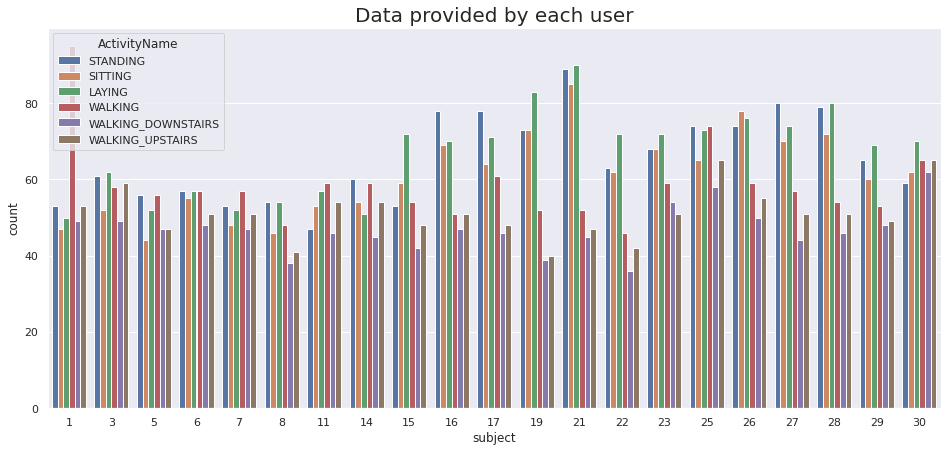

In [80]:

plt.figure(figsize=(16,7))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

In [88]:
columns = train.columns[:-3]
# # Removing '()' from column names
columns = list(map(lambda a: a.replace('()', ''), columns))
columns = list(map(lambda a: a.replace('-',''), columns))
columns = list(map(lambda a: a.replace(',',''), columns))
# print(columns)
print(type(columns + list(train.columns[-3:])))
train.columns = columns + list(train.columns[-3:])
test.columns = columns + list(test.columns[-3:])

test.columns

<class 'list'>


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angle(tBodyAccMeangravity)', 'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [91]:
train.to_csv('UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI HAR Dataset/csv_files/test.csv', index=False)

In [ ]:
# Feature

In [105]:
from sklearn.decomposition import PCA
# print(X_train.iloc[:, :-3])

pca = PCA(n_components =20)
fit = pca.fit(X_train.iloc[:, :-3])
transformed = fit.transform(X_train.iloc[:, :-3])
print(transformed.shape)

(7352, 20)


In [110]:
transformed.view()

array([[-5.52028030e+00, -2.90277517e-01, -1.52992855e+00, ...,
         6.31489685e-01,  5.42850025e-01,  6.26741971e-01],
       [-5.53534954e+00, -8.25302495e-02, -1.92480428e+00, ...,
        -4.51126763e-01,  1.85914371e-01,  7.33245012e-02],
       [-5.47498801e+00,  2.87387051e-01, -2.14464160e+00, ...,
        -3.24585267e-01,  5.48015227e-01,  1.59002600e-01],
       ...,
       [ 5.85750527e+00, -3.08184349e+00,  6.71207303e-01, ...,
        -5.90089287e-01, -1.77202949e-03,  1.25854887e+00],
       [ 5.42109482e+00, -3.42643018e+00,  6.71243268e-01, ...,
        -3.52286635e-01, -7.19227158e-02,  2.36666360e-01],
       [ 5.49797027e+00, -2.78992873e+00,  5.72224048e-03, ...,
         4.71462475e-01, -2.70503334e-01,  2.81732699e-01]])